In [1]:
from sklearn import svm
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
multi = pd.read_csv('inputMM_Means.csv')
df = pd.read_csv('inputS_Means.csv')

#multi = pd.read_csv('inputMM_PF.csv')
#df = pd.read_csv('inputS_PF.csv')

#multi = pd.read_csv('inputMM_Max.csv')
#df = pd.read_csv('inputS_Max.csv')


In [3]:
df

,6,6.5,7,7.5,8.2,9.3,target
0,0.000543,0.001225,0.000789,0.000381,0.001587,0.000611,6.5
1,0.001435,0.000491,0.000464,0.000948,0.000913,0.001151,6.5
2,0.000484,0.000793,0.000883,0.001108,0.000875,0.000417,6.5
3,0.000582,0.000635,0.001143,0.001388,0.000597,0.001538,6.5
4,0.000596,0.001177,0.000739,0.001341,0.000582,0.001357,6.5
...,...,...,...,...,...,...,...
349,0.001052,0.000627,0.000803,0.001280,0.001186,0.002961,9.3
350,0.000699,0.000642,0.000541,0.000711,0.000603,0.001773,9.3
351,0.000902,0.001029,0.001062,0.000395,0.001268,0.002614,9.3
352,0.001458,0.001387,0.000711,0.000792,0.000641,0.001278,9.3


In [4]:
multi

,6,6.5,7,7.5,8.2,9.3,target
0,0.000935,0.001757,0.001503,0.003940,0.000749,0.000765,7.5
1,0.001871,0.000909,0.001816,0.002846,0.001741,0.001715,7.5
2,0.002988,0.002231,0.002428,0.004053,0.001861,0.000945,7.5
3,0.000854,0.002129,0.001739,0.001381,0.002405,0.001745,8.2
4,0.002438,0.001480,0.001174,0.000601,0.003877,0.000959,8.2
...,...,...,...,...,...,...,...
295,0.000681,0.000942,0.002176,0.000406,0.000296,0.000698,6.0
296,0.001732,0.000875,0.000620,0.000608,0.000826,0.000376,6.0
297,0.001648,0.000898,0.000762,0.001253,0.000694,0.001108,6.0
298,0.000606,0.000832,0.000484,0.001111,0.000349,0.000589,6.0


In [5]:
#Prepare the input vectors and the output values
X = df.drop(['target'], axis=1)
y = df['target']

X_multi = df.drop(['target'], axis = 1)
y_multi = df['target']

In [6]:
#Split both dataset into training set and test set

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 101)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = model_selection.train_test_split(X_multi, y_multi, train_size = 0.80, test_size = 0.20, random_state = 101)

In [7]:
#preprocessing single 
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
encoder.fit(y_test)
y_test = encoder.transform(y_test)
#multi
encoder.fit(y_multi_train)
y_multi_train = encoder.transform(y_multi_train)
encoder.fit(y_multi_test)
y_multi_test = encoder.transform(y_multi_test)

## SVM classic

In [8]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
clf.fit(X_multi_train, y_multi_train)

SVC(kernel='linear')

In [10]:
clf_pred = clf.predict(X_multi_test)
clf_accuracy = accuracy_score(y_multi_test, clf_pred)
clf_f1 = f1_score(y_multi_test, clf_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (clf_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (clf_f1*100))

Accuracy (Polynomial Kernel):  23.94
F1 (Polynomial Kernel):  9.25


## SVM Polynomial kernel

In [11]:
# Parameters to be optimized with Cross Validation
params_grid = [{'kernel' : ['poly'], 'degree' : [x for x in range(1,3)], 'C' : [ 0.01, 0.1, 1, 10, 100]}]

In [12]:
svm_model_pol= GridSearchCV(SVC(), params_grid, cv=3, n_jobs = 2)
svm_model_pol.fit(X_train, y_train)
svm_model_pol.fit(X_multi_train, y_multi_train)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=2,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2],
                          'kernel': ['poly']}])

In [13]:
svm_model_pol.best_estimator_

SVC(C=100, degree=1, kernel='poly')

In [14]:
svm_pred = svm_model_pol.predict(X_multi_test)
svm_accuracy_pol = accuracy_score(y_multi_test, svm_pred)
svm_f1_pol = f1_score(y_multi_test, svm_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (svm_accuracy_pol*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (svm_f1_pol*100))

Accuracy (Polynomial Kernel):  77.46
F1 (Polynomial Kernel):  77.59


## SVM Gaussian Kernel

In [15]:
# Parameters to be optimized with Cross Validation
gamma_range = [1e-3, 1, 1e3]
params_grid = [{'kernel' : ['rbf'], 'gamma' : gamma_range, 'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

In [16]:
svm_model = GridSearchCV(SVC(), params_grid, cv=3)
svm_model.fit(X_train, y_train)
svm_model.fit(X_multi_train, y_multi_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 1, 1000.0], 'kernel': ['rbf']}])

In [17]:
svm_model.best_estimator_

SVC(C=100, gamma=1000.0)

In [18]:
svm_model.cv_results_

{'mean_fit_time': array([0.00692836, 0.00682306, 0.00785478, 0.00585214, 0.00845663,
        0.00816488, 0.00740663, 0.00827567, 0.00881441, 0.00650462,
        0.00814358, 0.00688092, 0.00519808, 0.00689514, 0.0061779 ,
        0.0042034 , 0.00652528, 0.00891542, 0.00530338, 0.00781743,
        0.00552702, 0.00586748, 0.00664862, 0.0051825 ]),
 'std_fit_time': array([0.00034128, 0.00093642, 0.00011095, 0.00165966, 0.00029837,
        0.00018909, 0.00081305, 0.00017111, 0.00051238, 0.00081315,
        0.0002642 , 0.00032823, 0.00069239, 0.00082113, 0.00084526,
        0.00039925, 0.0020792 , 0.00086313, 0.00056745, 0.0002483 ,
        0.00026536, 0.0017434 , 0.00136528, 0.00109979]),
 'mean_score_time': array([0.00376129, 0.0036962 , 0.0044682 , 0.00354346, 0.00452121,
        0.00497206, 0.00480151, 0.00427938, 0.00425688, 0.0040795 ,
        0.00352971, 0.00322493, 0.00285538, 0.00362229, 0.0029428 ,
        0.00334962, 0.00492438, 0.00473301, 0.0039374 , 0.00380961,
        0.002595

In [19]:
svm_pred = svm_model.predict(X_multi_test)
svm_accuracy_gau = accuracy_score(y_multi_test, svm_pred)
svm_f1_gau = f1_score(y_multi_test, svm_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (svm_accuracy_gau*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (svm_f1_gau*100))

Accuracy (Polynomial Kernel):  78.87
F1 (Polynomial Kernel):  79.37


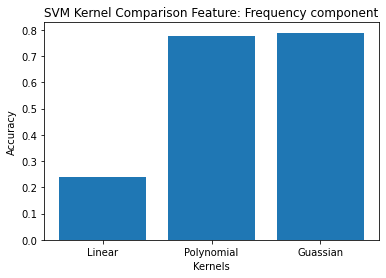

In [22]:
import matplotlib.pyplot as plt
import numpy as np 
x_axis = ["Linear", "Polynomial", "Guassian"]
y_axis = [clf_accuracy, svm_accuracy_pol, svm_accuracy_gau]
X_axis = np.arange(len(X))
X_axis
plt.bar(x_axis, y_axis)

plt.xticks = (X_axis,x_axis)
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.title("SVM Kernel Comparison Feature: Frequency component")

plt.show()

In [21]:
0

0